Koden er tatt/inspirert av tidliogere seminar eksempler

In [3]:
from bs4 import BeautifulSoup
import requests

def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://www.worldometers.info/world-population/')
table_html=tables[0]
#printing top
print(str(table_html)[:1000])

<table class="table table-striped table-bordered table-hover table-condensed table-list"><thead> <tr> <th>Year<br/> (July 1) </th><th>Population</th><th>Yearly % <br/> Change</th><th>Yearly<br/> Change</th><th>Median <br/>Age</th><th>Fertility <br/>Rate</th><th>Density <br/>(P/Km²)</th><th>Urban<br/> Pop %</th><th>Urban Population</th> </tr><tr> <td>2020</td> <td><strong>7,794,798,739</strong></td> <td>1.05 %</td> <td>81,330,639</td> <td>30.9</td> <td>2.47</td> <td>52</td> <td>56.2 %</td> <td>4,378,993,944</td> </tr> <tr> <td>2019</td> <td><strong>7,713,468,100</strong></td> <td>1.08 %</td> <td>82,377,060</td> <td>29.8</td> <td>2.51</td> <td>52</td> <td>55.7 %</td> <td>4,299,438,618</td> </tr></thead><tbody><tr> <td>2018</td> <td><strong>7,631,091,040</strong></td> <td>1.10 %</td> <td>83,232,115</td> <td>29.8</td> <td>2.51</td> <td>51</td> <td>55.3 %</td> <td>4,219,817,318</td></tr><tr> <td>2017</td> <td><strong>7,547,858,925</strong></td> <td>1.12 %</td> <td>83,836,876</td> <td>29.8</

In [5]:
def html_to_table(html):
    "Returns the table defined in html as a list"
    table=[]
    for row in html.find_all('tr'):
        r=[]
        cells=row.find_all('td')
        if len(cells)==0:
            cells=row.find_all('th')
        for cell in cells:
            cell=format(cell)
            r.append(cell):
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])

    s=s.replace('\xa0','')
    s=s.replace('\n','')
    return s

table=html_to_table(table_html)

#printing top
print(str(table)[:1000])

[['Year (July 1) ', 'Population', 'Yearly %  Change', 'Yearly Change', 'Median Age', 'Fertility Rate', 'Density (P/Km²)', 'Urban Pop %', 'Urban Population'], ['2020', '7,794,798,739', '1.05 %', '81,330,639', '30.9', '2.47', '52', '56.2 %', '4,378,993,944'], ['2019', '7,713,468,100', '1.08 %', '82,377,060', '29.8', '2.51', '52', '55.7 %', '4,299,438,618'], ['2018', '7,631,091,040', '1.10 %', '83,232,115', '29.8', '2.51', '51', '55.3 %', '4,219,817,318'], ['2017', '7,547,858,925', '1.12 %', '83,836,876', '29.8', '2.51', '51', '54.9 %', '4,140,188,594'], ['2016', '7,464,022,049', '1.14 %', '84,224,910', '29.8', '2.51', '50', '54.4 %', '4,060,652,683'], ['2015', '7,379,797,139', '1.19 %', '84,594,707', '30', '2.52', '50', '54.0 %', '3,981,497,663'], ['2010', '6,956,823,603', '1.24 %', '82,983,315', '28', '2.58', '47', '51.7 %', '3,594,868,146'], ['2005', '6,541,907,027', '1.26 %', '79,682,641', '27', '2.65', '44', '49.2 %', '3,215,905,863'], ['2000', '6,143,493,823', '1.35 %', '79,856,169'

In [6]:
';'.join(table[0])

'Year (July 1) ;Population;Yearly %  Change;Yearly Change;Median Age;Fertility Rate;Density (P/Km²);Urban Pop %;Urban Population'

In [7]:
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('worldpop.csv',table)

In [8]:
import pandas as pd
pd.read_csv('worldpop.csv', delimiter=';', encoding='latin1')

,Year (July 1),Population,Yearly % Change,Yearly Change,Median Age,Fertility Rate,Density (P/KmÂ²),Urban Pop %,Urban Population
0,2020,"7,794,798,739",1.05 %,"81,330,639",30.9,2.47,52,56.2 %,"4,378,993,944"
1,2019,"7,713,468,100",1.08 %,"82,377,060",29.8,2.51,52,55.7 %,"4,299,438,618"
2,2018,"7,631,091,040",1.10 %,"83,232,115",29.8,2.51,51,55.3 %,"4,219,817,318"
3,2017,"7,547,858,925",1.12 %,"83,836,876",29.8,2.51,51,54.9 %,"4,140,188,594"
4,2016,"7,464,022,049",1.14 %,"84,224,910",29.8,2.51,50,54.4 %,"4,060,652,683"
5,2015,"7,379,797,139",1.19 %,"84,594,707",30.0,2.52,50,54.0 %,"3,981,497,663"
6,2010,"6,956,823,603",1.24 %,"82,983,315",28.0,2.58,47,51.7 %,"3,594,868,146"
7,2005,"6,541,907,027",1.26 %,"79,682,641",27.0,2.65,44,49.2 %,"3,215,905,863"
8,2000,"6,143,493,823",1.35 %,"79,856,169",26.0,2.78,41,46.7 %,"2,868,307,513"
9,1995,"5,744,212,979",1.52 %,"83,396,384",25.0,3.01,39,44.8 %,"2,575,505,235"


In [9]:
wp  = pd.read_csv("worldpop.csv", delimiter=';', encoding='latin1')#reading data
wp

,Year (July 1),Population,Yearly % Change,Yearly Change,Median Age,Fertility Rate,Density (P/KmÂ²),Urban Pop %,Urban Population
0,2020,"7,794,798,739",1.05 %,"81,330,639",30.9,2.47,52,56.2 %,"4,378,993,944"
1,2019,"7,713,468,100",1.08 %,"82,377,060",29.8,2.51,52,55.7 %,"4,299,438,618"
2,2018,"7,631,091,040",1.10 %,"83,232,115",29.8,2.51,51,55.3 %,"4,219,817,318"
3,2017,"7,547,858,925",1.12 %,"83,836,876",29.8,2.51,51,54.9 %,"4,140,188,594"
4,2016,"7,464,022,049",1.14 %,"84,224,910",29.8,2.51,50,54.4 %,"4,060,652,683"
5,2015,"7,379,797,139",1.19 %,"84,594,707",30.0,2.52,50,54.0 %,"3,981,497,663"
6,2010,"6,956,823,603",1.24 %,"82,983,315",28.0,2.58,47,51.7 %,"3,594,868,146"
7,2005,"6,541,907,027",1.26 %,"79,682,641",27.0,2.65,44,49.2 %,"3,215,905,863"
8,2000,"6,143,493,823",1.35 %,"79,856,169",26.0,2.78,41,46.7 %,"2,868,307,513"
9,1995,"5,744,212,979",1.52 %,"83,396,384",25.0,3.01,39,44.8 %,"2,575,505,235"


In [45]:
y=wp['Fertility Rate']
pd.DataFrame(y)

,Fertility Rate
0,2.47
1,2.51
2,2.51
3,2.51
4,2.51
5,2.52
6,2.58
7,2.65
8,2.78
9,3.01


In [46]:
import numpy as np
from matplotlib import pyplot as plt

x=pd.DataFrame(np.log(wp['Median Age']))
x['intercept']=1
x

,Median Age,intercept
0,3.430756,1
1,3.394508,1
2,3.394508,1
3,3.394508,1
4,3.394508,1
5,3.401197,1
6,3.332205,1
7,3.295837,1
8,3.258097,1
9,3.218876,1


In [50]:
from statsmodels.regression.linear_model import OLS

res=OLS(y,x).fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Fertility Rate   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     68.39
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           3.60e-07
Time:                        16:13:24   Log-Likelihood:                -10.400
No. Observations:                  18   AIC:                             24.80
Df Residuals:                      16   BIC:                             26.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Median Age    -7.1179      0.861     -8.270      0.0

/usr/local/Miniconda3-py39_4.10.3-Linux-x86_64/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


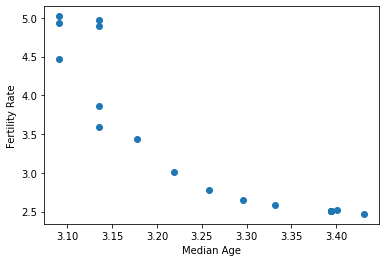

In [51]:
from matplotlib import pyplot as plt

fig,ax=plt.subplots()
#adding axis lables:
ax.set_ylabel('Fertility Rate')
ax.set_xlabel('Median Age')

ax.scatter(np.log(wp['Median Age']), wp['Fertility Rate'])
ax.legend(loc='lower right',frameon=False)

In [52]:
res.params

Median Age    -7.117852
intercept     26.537911
dtype: float64

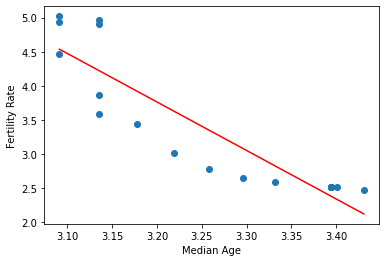

In [53]:
x=np.linspace(min(np.log(wp['Median Age'])), max(np.log(wp['Median Age'])), 100)

regression_line=res.params['intercept']+res.params['Median Age']*x

ax.plot(x, regression_line,color='red')
fig

Jeg har laget en regresjons linje der jeg har valgt Median Age og Fertility Rate som x og y variabel,
med en intercept på 1 til x variabelen, dette gjør at når vi bruker funksjonen: "regression_line=res.params['intercept']+res.params['Median Age']*x"
får vi 38.803611 -10.805390 *x som gir oss regresjons linjen vår.
Fordi coef til Median Age er negativ så vil en økning i x gi
oss resulatet i en avtagende linjær regresjons linje. Dette viser oss en sammenhenging mellom x og y.
